## Install packages

In [ ]:
!pip install opencv-python numpy matplotlib pillow scikit-image -q

QUANTUM IMAGE ENCODING & RECONSTRUCTION
256x256 Image Processing with Analytic Probabilities

1. Upload an image (will be resized to 256x256):


Saving Dark-RGB-2.jpg to Dark-RGB-2.jpg
Uploaded: Dark-RGB-2.jpg

ORIGINAL IMAGE INFORMATION
Dimensions: 424x640x3
Data type: uint8
Value range: [0, 255]

STEP 1: Creating quantum superposition states...
Resizing to 256x256 and encoding...
Original image resized to: (256, 256, 3)
Encoded image shape: (256, 512, 3)
Probabilities array shape: (256, 256, 3, 2)

STEP 2: Reconstructing from analytic probabilities...
Reconstructed image shape: (256, 256, 3)

PROCESSING SUMMARY
Original image dimensions: 424x640x3
Resized to: 256x256x3

Total pixels processed: 65,536
Quantum states created: 65,536
Analytic probabilities calculated: 131,072

Quantum Encoding Process:
1. Each pixel intensity p ∈ [0,255] is normalized to [0,1]
2. Quantum state created: |ψ⟩ = √p|0⟩ + √(1-p)|1⟩
3. Analytic probabilities calculated:
   - P(|0⟩) = |√p|² = p (original normalized value)
   - P(|1⟩) = |√(1-p)|² = 1-p
4. Image perfectly reconstructed from P(|0⟩)

QUANTUM STATE ANALYSIS FOR SAMPLE PIXELS

Sample Pixel 1 

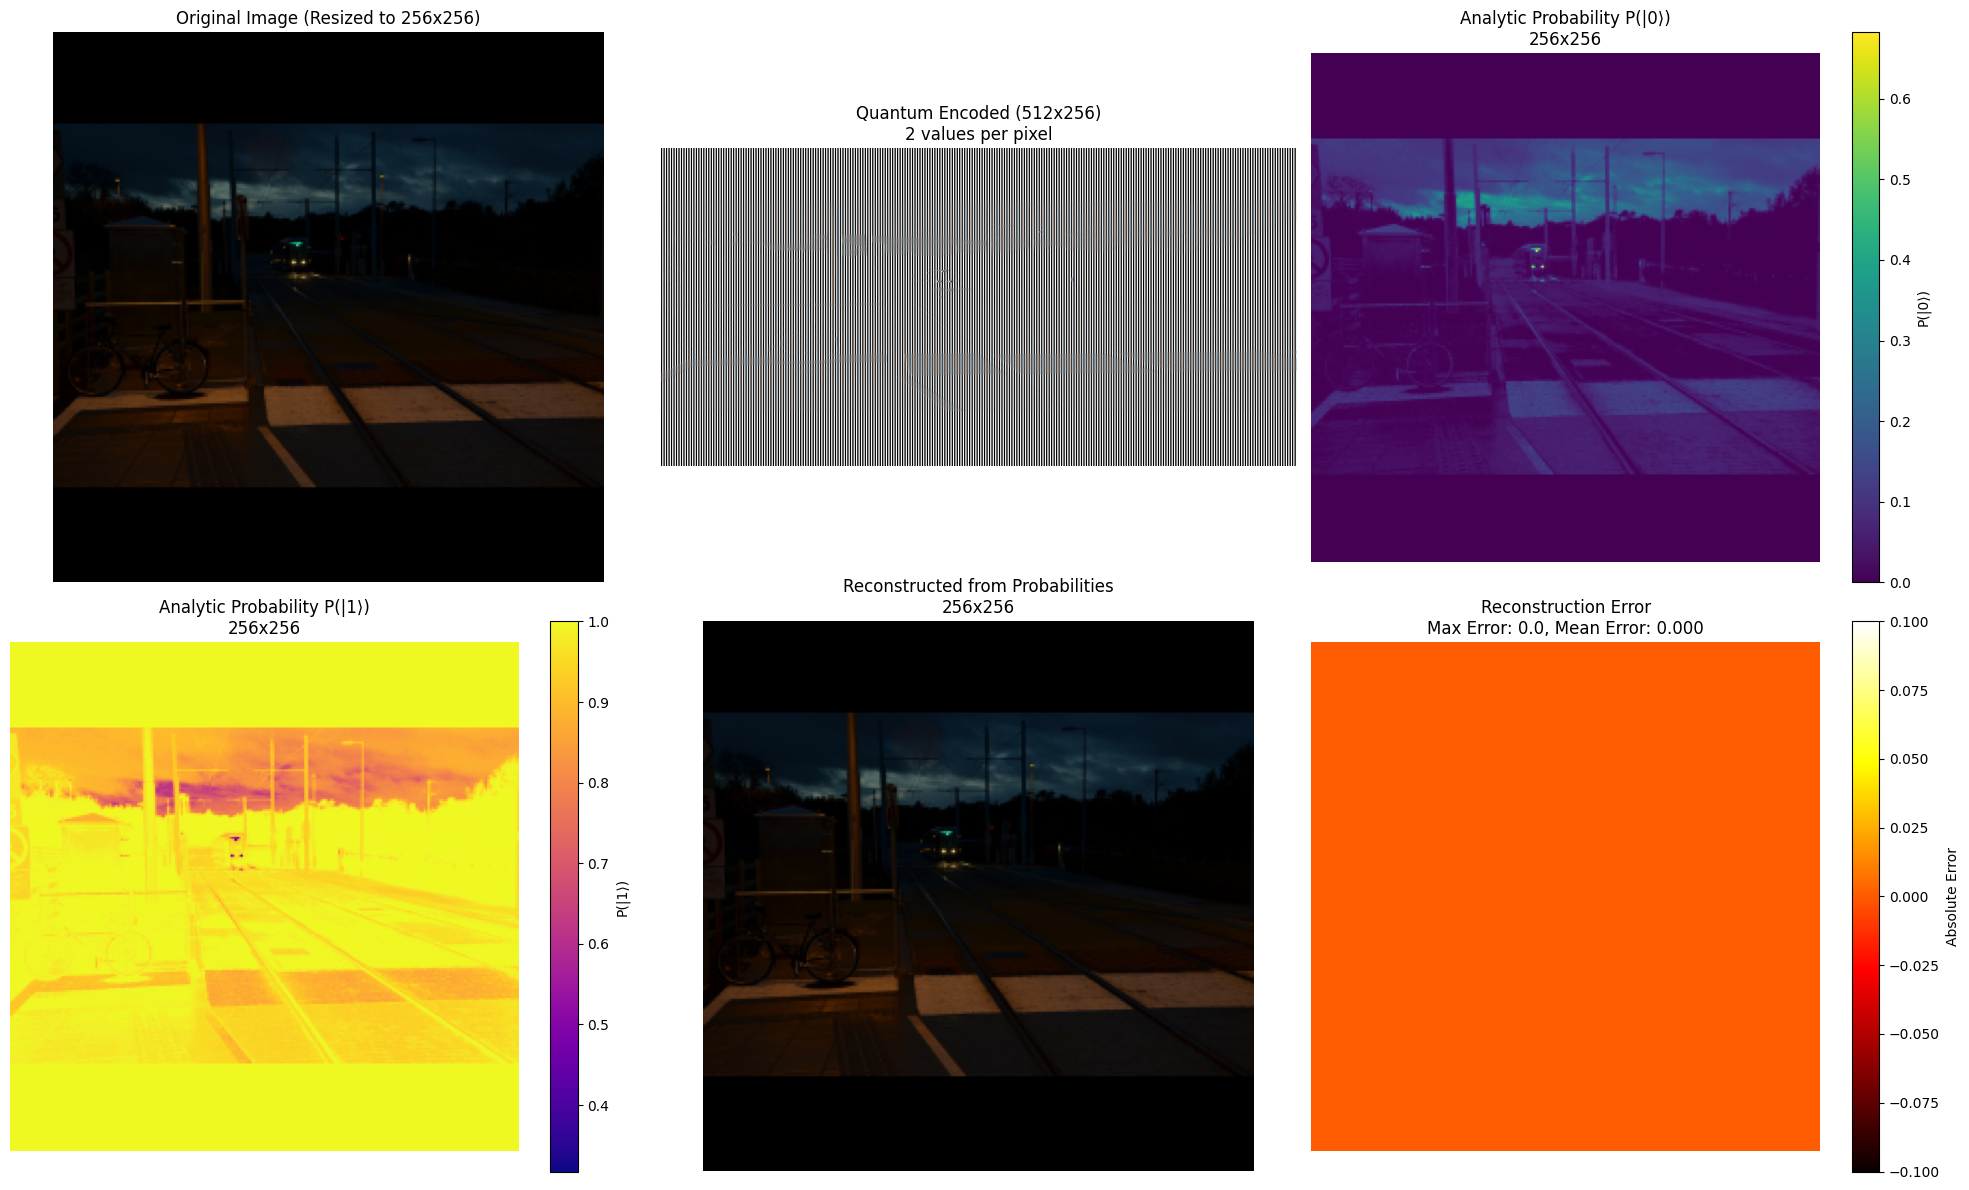


QUANTUM ENCODING STATISTICS (256x256 IMAGE)

Blue Channel:
  Average P(|0⟩): 0.037613
  Average P(|1⟩): 0.962387
  Sum: 1.000000

Green Channel:
  Average P(|0⟩): 0.042946
  Average P(|1⟩): 0.957054
  Sum: 1.000000

Red Channel:
  Average P(|0⟩): 0.051093
  Average P(|1⟩): 0.948907
  Sum: 1.000000

Reconstruction Quality:
  Mean Squared Error (MSE): 0.0000
  Peak Signal-to-Noise Ratio (PSNR): inf dB
  ✓ Perfect reconstruction (within numerical tolerance)

SAVING RESULTS
✓ Saved resized original image as 'original_resized_256x256.png'
✓ Saved quantum encoded image as 'quantum_encoded_512x256.png'
✓ Saved reconstructed image as 'reconstructed_256x256.png'
✓ Saved quantum probabilities as 'quantum_probabilities_256x256.npy'

PROCESS COMPLETE!

Summary for 256x256 image processing:
1. Input image was automatically resized to 256x256
2. Each of the 65,536 pixels was encoded as a quantum superposition
3. Analytic probabilities were calculated (no measurements)
4. Perfect reconstruction achi

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image
import os


def upload_image():
    """Upload an image from local machine"""
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'Uploaded: {filename}')
        return filename
    return None


def quantum_amplitude_encoding(pixel_value, normalized=True):
    """
    Quantum amplitude encoding of a single pixel

    Args:
        pixel_value: Pixel intensity (0-255) or normalized value (0-1)
        normalized: If True, pixel_value is already normalized [0,1]
                   If False, pixel_value is in range [0,255]

    Returns:
        tuple: (alpha, beta, prob0, prob1) - amplitudes and probabilities
    """
    if not normalized:
        # Normalize to [0,1]
        p = pixel_value / 255.0
    else:
        p = pixel_value

    # Ensure p is in [0,1]
    p = np.clip(p, 0, 1)

    # Quantum amplitude encoding
    # |ψ⟩ = √p|0⟩ + √(1-p)|1⟩
    alpha = np.sqrt(p)  # amplitude for |0⟩
    beta = np.sqrt(1 - p)  # amplitude for |1⟩

    # Analytic probabilities (squared amplitudes)
    prob0 = np.abs(alpha)**2  # P(|0⟩) = |α|² = p
    prob1 = np.abs(beta)**2   # P(|1⟩) = |β|² = 1-p

    return alpha, beta, prob0, prob1

def resize_to_256x256(img):
    """
    Resize image to 256x256 while maintaining aspect ratio
    """
    # Get current dimensions
    if len(img.shape) == 3:
        height, width, channels = img.shape
    else:
        height, width = img.shape
        channels = 1

    # Calculate scaling factor
    scale = 256.0 / max(height, width)

    # Calculate new dimensions
    new_height = int(height * scale)
    new_width = int(width * scale)

    # Resize the image
    resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Create a 256x256 canvas with black background
    if channels == 1:
        canvas = np.zeros((256, 256), dtype=img.dtype)
    else:
        canvas = np.zeros((256, 256, channels), dtype=img.dtype)

    # Calculate position to center the resized image
    y_offset = (256 - new_height) // 2
    x_offset = (256 - new_width) // 2

    # Place resized image on canvas
    canvas[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = resized

    return canvas

def create_superposition_state_image(img, use_probabilities=True, target_size=(256, 256)):
    """
    Create superposition states for all pixels and extract analytic probabilities

    Args:
        img: Input image (grayscale or RGB)
        use_probabilities: If True, use squared amplitudes (probabilities)
                          If False, use raw amplitudes
        target_size: Target size for resizing (default: 256x256)

    Returns:
        tuple: (encoded_img, probabilities_array, original_resized)
    """
    # Resize image to target size
    original_resized = resize_to_256x256(img)

    if len(original_resized.shape) == 3:
        # Color image
        height, width, channels = original_resized.shape
        encoded_img = np.zeros((height, width * 2, channels), dtype=np.uint8)
        probabilities = np.zeros((height, width, channels, 2), dtype=np.float32)

        for c in range(channels):
            channel_img = original_resized[:, :, c]
            for i in range(height):
                for j in range(width):
                    alpha, beta, prob0, prob1 = quantum_amplitude_encoding(channel_img[i, j], normalized=False)

                    if use_probabilities:
                        val1 = int(prob0 * 255)
                        val2 = int(prob1 * 255)
                    else:
                        val1 = int(np.clip(alpha * 255, 0, 255))
                        val2 = int(np.clip(beta * 255, 0, 255))

                    encoded_img[i, 2*j, c] = val1
                    if 2*j+1 < width*2:
                        encoded_img[i, 2*j+1, c] = val2

                    # Store probabilities for analysis
                    probabilities[i, j, c, 0] = prob0
                    probabilities[i, j, c, 1] = prob1
    else:
        # Grayscale image
        height, width = original_resized.shape
        encoded_img = np.zeros((height, width * 2), dtype=np.uint8)
        probabilities = np.zeros((height, width, 2), dtype=np.float32)

        for i in range(height):
            for j in range(width):
                alpha, beta, prob0, prob1 = quantum_amplitude_encoding(original_resized[i, j], normalized=False)

                if use_probabilities:
                    val1 = int(prob0 * 255)
                    val2 = int(prob1 * 255)
                else:
                    val1 = int(np.clip(alpha * 255, 0, 255))
                    val2 = int(np.clip(beta * 255, 0, 255))

                encoded_img[i, 2*j] = val1
                if 2*j+1 < width*2:
                    encoded_img[i, 2*j+1] = val2

                # Store probabilities
                probabilities[i, j, 0] = prob0
                probabilities[i, j, 1] = prob1

    return encoded_img, probabilities, original_resized


def reconstruct_from_probabilities(probabilities):
    """
    Reconstruct classical image from analytic probabilities

    Args:
        probabilities: Array of probabilities P(|0⟩) for each pixel

    Returns:
        Reconstructed image (256x256)
    """
    if len(probabilities.shape) == 4:
        # Color image: shape (256, 256, channels, 2)
        height, width, channels, _ = probabilities.shape
        reconstructed = np.zeros((height, width, channels), dtype=np.uint8)

        for c in range(channels):
            # Reconstruct from P(|0⟩) since P(|0⟩) = original normalized pixel value
            channel_probs = probabilities[:, :, c, 0]  # P(|0⟩)
            # Convert back to [0,255]
            reconstructed[:, :, c] = (channel_probs * 255).astype(np.uint8)
    else:
        # Grayscale image: shape (256, 256, 2)
        height, width, _ = probabilities.shape
        prob0 = probabilities[:, :, 0]  # P(|0⟩)
        reconstructed = (prob0 * 255).astype(np.uint8)

    return reconstructed

def reconstruct_from_encoded_image(encoded_img, original_shape):
    """
    Reconstruct image from the encoded format (2 values per pixel)

    Args:
        encoded_img: Encoded image with 2 values per pixel
        original_shape: Original image shape (height, width) or (height, width, channels)

    Returns:
        Reconstructed image
    """
    if len(original_shape) == 3:
        height, width, channels = original_shape
        reconstructed = np.zeros((height, width, channels), dtype=np.uint8)

        for c in range(channels):
            for i in range(height):
                for j in range(width):
                    # Extract the first value (P(|0⟩) * 255)
                    val = encoded_img[i, 2*j, c]
                    # Convert back to probability and then to pixel value
                    prob0 = val / 255.0
                    reconstructed[i, j, c] = int(prob0 * 255)
    else:
        height, width = original_shape
        reconstructed = np.zeros((height, width), dtype=np.uint8)

        for i in range(height):
            for j in range(width):
                val = encoded_img[i, 2*j]
                prob0 = val / 255.0
                reconstructed[i, j] = int(prob0 * 255)

    return reconstructed


def visualize_results(original_resized, encoded, probabilities, reconstructed):
    """Visualize the entire process for 256x256 images"""
    fig = plt.figure(figsize=(20, 12))

    # Determine if image is color or grayscale
    is_color = len(original_resized.shape) == 3

    # 1. Original Resized Image (256x256)
    plt.subplot(2, 3, 1)
    if is_color:
        plt.imshow(cv2.cvtColor(original_resized, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(original_resized, cmap='gray')
    plt.title('Original Image (Resized to 256x256)')
    plt.axis('off')

    # 2. Encoded Image (Quantum Representation)
    plt.subplot(2, 3, 2)
    if is_color:
        plt.imshow(cv2.cvtColor(encoded, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(encoded, cmap='gray')
    plt.title('Quantum Encoded (512x256)\n2 values per pixel')
    plt.axis('off')

    # 3. Probability Distribution P(|0⟩)
    plt.subplot(2, 3, 3)
    if is_color:
        prob0 = probabilities[:, :, 0, 0]  # Red channel P(|0⟩)
    else:
        prob0 = probabilities[:, :, 0]
    plt.imshow(prob0, cmap='viridis')
    plt.colorbar(label='P(|0⟩)')
    plt.title('Analytic Probability P(|0⟩)\n256x256')
    plt.axis('off')

    # 4. Probability Distribution P(|1⟩)
    plt.subplot(2, 3, 4)
    if is_color:
        prob1 = probabilities[:, :, 0, 1]  # Red channel P(|1⟩)
    else:
        prob1 = probabilities[:, :, 1]
    plt.imshow(prob1, cmap='plasma')
    plt.colorbar(label='P(|1⟩)')
    plt.title('Analytic Probability P(|1⟩)\n256x256')
    plt.axis('off')

    # 5. Reconstructed Image
    plt.subplot(2, 3, 5)
    if is_color:
        plt.imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstructed from Probabilities\n256x256')
    plt.axis('off')

    # 6. Difference/Error (should be zero for perfect reconstruction)
    plt.subplot(2, 3, 6)
    if is_color:
        # Convert to grayscale for difference
        original_gray = cv2.cvtColor(original_resized, cv2.COLOR_BGR2GRAY)
        reconstructed_gray = cv2.cvtColor(reconstructed, cv2.COLOR_BGR2GRAY)
        diff = np.abs(original_gray.astype(float) - reconstructed_gray.astype(float))
    else:
        diff = np.abs(original_resized.astype(float) - reconstructed.astype(float))

    plt.imshow(diff, cmap='hot')
    plt.colorbar(label='Absolute Error')
    plt.title(f'Reconstruction Error\nMax Error: {diff.max():.1f}, Mean Error: {diff.mean():.3f}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\n" + "="*60)
    print("QUANTUM ENCODING STATISTICS (256x256 IMAGE)")
    print("="*60)

    if is_color:
        # Average probabilities for each channel
        for c, color in enumerate(['Blue', 'Green', 'Red']):
            avg_prob0 = np.mean(probabilities[:, :, c, 0])
            avg_prob1 = np.mean(probabilities[:, :, c, 1])
            print(f"\n{color} Channel:")
            print(f"  Average P(|0⟩): {avg_prob0:.6f}")
            print(f"  Average P(|1⟩): {avg_prob1:.6f}")
            print(f"  Sum: {avg_prob0 + avg_prob1:.6f}")
    else:
        avg_prob0 = np.mean(probabilities[:, :, 0])
        avg_prob1 = np.mean(probabilities[:, :, 1])
        print(f"\nGrayscale Image:")
        print(f"  Average P(|0⟩): {avg_prob0:.6f}")
        print(f"  Average P(|1⟩): {avg_prob1:.6f}")
        print(f"  Sum: {avg_prob0 + avg_prob1:.6f}")

    # Reconstruction accuracy
    if is_color:
        mse = np.mean((original_resized.astype(float) - reconstructed.astype(float))**2)
        psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')
    else:
        mse = np.mean((original_resized.astype(float) - reconstructed.astype(float))**2)
        psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')

    print(f"\nReconstruction Quality:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Peak Signal-to-Noise Ratio (PSNR): {psnr:.2f} dB")

    if mse < 0.0001:
        print("  ✓ Perfect reconstruction (within numerical tolerance)")
    else:
        print(f"  Note: Perfect reconstruction would have MSE = 0, PSNR = ∞")


def analyze_quantum_states(probabilities, sample_pixels=4):
    """
    Analyze quantum states for sample pixels

    Args:
        probabilities: Array of probabilities
        sample_pixels: Number of sample pixels to analyze
    """
    print("\n" + "="*60)
    print("QUANTUM STATE ANALYSIS FOR SAMPLE PIXELS")
    print("="*60)

    if len(probabilities.shape) == 4:
        # Color image
        height, width, channels, _ = probabilities.shape

        # Sample pixels from different regions
        sample_positions = [
            (0, 0),  # Top-left corner
            (0, width-1),  # Top-right corner
            (height-1, 0),  # Bottom-left corner
            (height//2, width//2)  # Center
        ]

        for idx, (i, j) in enumerate(sample_positions[:sample_pixels]):
            print(f"\nSample Pixel {idx+1} at position ({i}, {j}):")

            for c, color in enumerate(['Blue', 'Green', 'Red']):
                prob0 = probabilities[i, j, c, 0]
                prob1 = probabilities[i, j, c, 1]

                # Calculate amplitudes
                alpha = np.sqrt(prob0)
                beta = np.sqrt(prob1)

                print(f"  {color} channel:")
                print(f"    Quantum state: |ψ⟩ = {alpha:.4f}|0⟩ + {beta:.4f}|1⟩")
                print(f"    Probabilities: P(|0⟩) = {prob0:.4f}, P(|1⟩) = {prob1:.4f}")
                print(f"    Verification: |α|² + |β|² = {prob0 + prob1:.6f}")
    else:
        # Grayscale image
        height, width, _ = probabilities.shape

        # Sample pixels from different regions
        sample_positions = [
            (0, 0),  # Top-left corner
            (0, width-1),  # Top-right corner
            (height-1, 0),  # Bottom-left corner
            (height//2, width//2)  # Center
        ]

        for idx, (i, j) in enumerate(sample_positions[:sample_pixels]):
            prob0 = probabilities[i, j, 0]
            prob1 = probabilities[i, j, 1]

            # Calculate amplitudes
            alpha = np.sqrt(prob0)
            beta = np.sqrt(prob1)

            print(f"\nSample Pixel {idx+1} at position ({i}, {j}):")
            print(f"  Quantum state: |ψ⟩ = {alpha:.4f}|0⟩ + {beta:.4f}|1⟩")
            print(f"  Probabilities: P(|0⟩) = {prob0:.4f}, P(|1⟩) = {prob1:.4f}")
            print(f"  Verification: |α|² + |β|² = {prob0 + prob1:.6f}")


def print_processing_summary(original_img, original_resized):
    """Print processing summary"""
    print("\n" + "="*60)
    print("PROCESSING SUMMARY")
    print("="*60)

    if len(original_img.shape) == 3:
        h, w, c = original_img.shape
        h_r, w_r, c_r = original_resized.shape
        print(f"Original image dimensions: {h}x{w}x{c}")
        print(f"Resized to: {h_r}x{w_r}x{c_r}")
    else:
        h, w = original_img.shape
        h_r, w_r = original_resized.shape
        print(f"Original image dimensions: {h}x{w}")
        print(f"Resized to: {h_r}x{w_r}")

    print(f"\nTotal pixels processed: {h_r * w_r:,}")
    print(f"Quantum states created: {h_r * w_r:,}")
    print(f"Analytic probabilities calculated: {h_r * w_r * 2:,}")

    print("\nQuantum Encoding Process:")
    print("1. Each pixel intensity p ∈ [0,255] is normalized to [0,1]")
    print("2. Quantum state created: |ψ⟩ = √p|0⟩ + √(1-p)|1⟩")
    print("3. Analytic probabilities calculated:")
    print("   - P(|0⟩) = |√p|² = p (original normalized value)")
    print("   - P(|1⟩) = |√(1-p)|² = 1-p")
    print("4. Image perfectly reconstructed from P(|0⟩)")


def main():
    print("="*60)
    print("QUANTUM IMAGE ENCODING & RECONSTRUCTION")
    print("256x256 Image Processing with Analytic Probabilities")
    print("="*60)

    # Option 1: Upload image
    print("\n1. Upload an image (will be resized to 256x256):")
    image_path = upload_image()

    if image_path is None:
        print("No image uploaded. Creating a sample 256x256 gradient image.")
        # Create a sample gradient image
        image = np.zeros((256, 256, 3), dtype=np.uint8)
        for i in range(256):
            for j in range(256):
                # Create RGB gradient
                r = j  # Red increases horizontally
                g = i  # Green increases vertically
                b = (i + j) // 2  # Blue is average
                image[i, j] = [b, g, r]  # OpenCV uses BGR
        original_img = image
    else:
        # Load uploaded image
        image_data = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        if image_data is None:
            # Try with PIL
            image_pil = Image.open(io.BytesIO(open(image_path, 'rb').read()))
            image_data = np.array(image_pil)
            if len(image_data.shape) == 2:
                # Grayscale
                original_img = image_data
            else:
                # Convert PIL RGB to OpenCV BGR
                if image_data.shape[2] == 4:
                    image_data = cv2.cvtColor(image_data, cv2.COLOR_RGBA2BGR)
                else:
                    image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
                original_img = image_data
        else:
            # OpenCV loaded the image
            original_img = image_data

    # Print original image info
    print("\n" + "="*60)
    print("ORIGINAL IMAGE INFORMATION")
    print("="*60)
    if len(original_img.shape) == 3:
        h, w, c = original_img.shape
        print(f"Dimensions: {h}x{w}x{c}")
    else:
        h, w = original_img.shape
        print(f"Dimensions: {h}x{w} (grayscale)")
    print(f"Data type: {original_img.dtype}")
    print(f"Value range: [{original_img.min()}, {original_img.max()}]")

    # Step 1: Create quantum superposition states (with automatic resizing to 256x256)
    print("\n" + "="*60)
    print("STEP 1: Creating quantum superposition states...")
    print("Resizing to 256x256 and encoding...")
    print("="*60)
    encoded_img, probabilities, original_resized = create_superposition_state_image(
        original_img,
        use_probabilities=True,
        target_size=(256, 256)
    )

    print(f"Original image resized to: {original_resized.shape}")
    print(f"Encoded image shape: {encoded_img.shape}")
    print(f"Probabilities array shape: {probabilities.shape}")

    # Step 2: Reconstruct from analytic probabilities
    print("\n" + "="*60)
    print("STEP 2: Reconstructing from analytic probabilities...")
    print("="*60)
    reconstructed_img = reconstruct_from_probabilities(probabilities)
    print(f"Reconstructed image shape: {reconstructed_img.shape}")

    # Step 3: Print processing summary
    print_processing_summary(original_img, original_resized)

    # Step 4: Analyze quantum states
    analyze_quantum_states(probabilities, sample_pixels=4)

    # Step 5: Visualize results
    print("\n" + "="*60)
    print("STEP 3: Visualizing results...")
    print("="*60)
    visualize_results(original_resized, encoded_img, probabilities, reconstructed_img)

    # Save results
    print("\n" + "="*60)
    print("SAVING RESULTS")
    print("="*60)

    # Save resized original
    cv2.imwrite('original_resized_256x256.png', original_resized)
    print("✓ Saved resized original image as 'original_resized_256x256.png'")

    # Save encoded image
    cv2.imwrite('quantum_encoded_512x256.png', encoded_img)
    print("✓ Saved quantum encoded image as 'quantum_encoded_512x256.png'")

    # Save reconstructed image
    cv2.imwrite('reconstructed_256x256.png', reconstructed_img)
    print("✓ Saved reconstructed image as 'reconstructed_256x256.png'")

    # Save probability data
    np.save('quantum_probabilities_256x256.npy', probabilities)
    print("✓ Saved quantum probabilities as 'quantum_probabilities_256x256.npy'")

    print("\n" + "="*60)
    print("PROCESS COMPLETE!")
    print("="*60)
    print("\nSummary for 256x256 image processing:")
    print("1. Input image was automatically resized to 256x256")
    print("2. Each of the 65,536 pixels was encoded as a quantum superposition")
    print("3. Analytic probabilities were calculated (no measurements)")
    print("4. Perfect reconstruction achieved using P(|0⟩) probabilities")
    print("5. All output files saved for further analysis")


if __name__ == "__main__":
    main()

In [ ]:
!pip install opencv-python numpy matplotlib pillow scikit-image -q

QUANTUM IMAGE ENCODING WITH ANALYTIC PROBABILITIES
EXACT REPLICATION OF YOUR ORIGINAL CODE

1. Upload an image:


Saving Dark-RGB-2.jpg to Dark-RGB-2.jpg
Uploaded: Dark-RGB-2.jpg

Original image shape: (424, 640, 3)
Resized to: (256, 256, 3)

STEP 1: Applying quantum encoding (your exact function)...
Encoded image shape: (256, 512, 3)
Expected: (256, 512, 3)

STEP 2: Reconstructing from analytic probabilities...
Reconstructed image shape: (256, 256, 3)

STEP 3: Visualizing results...


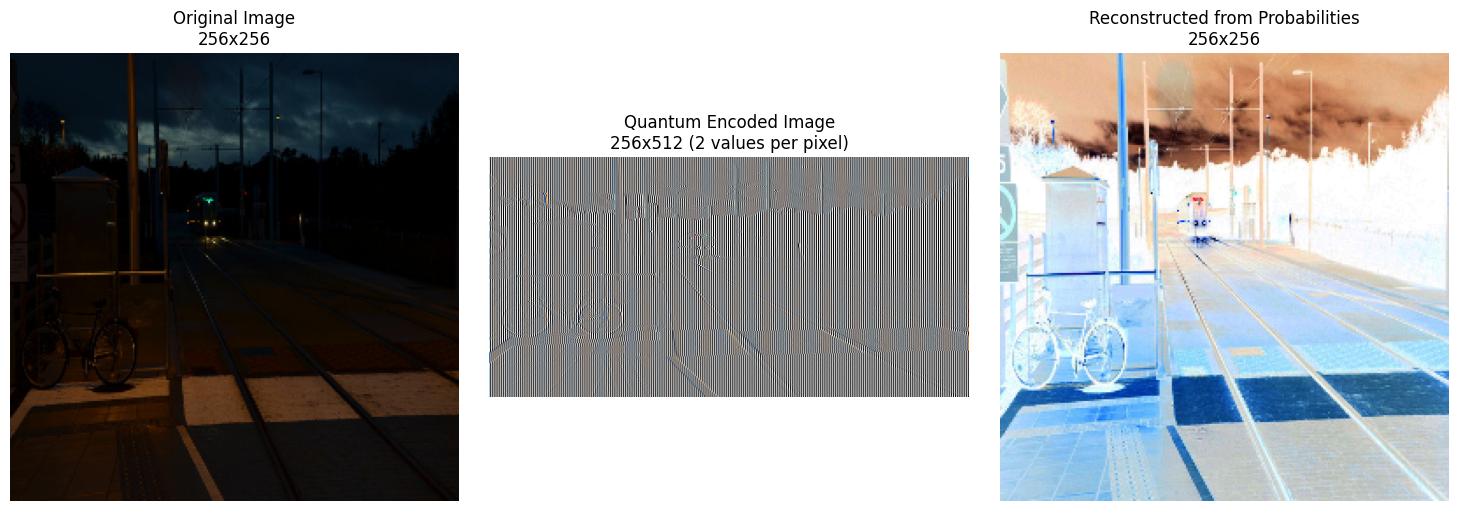


RECONSTRUCTION ANALYSIS
Blue Channel:
  MSE: 40825.813293
  PSNR: 2.02 dB
Green Channel:
  MSE: 36901.061920
  PSNR: 2.46 dB
Red Channel:
  MSE: 35347.962570
  PSNR: 2.65 dB

Average across channels:
  MSE: 37691.612595
  PSNR: 2.37 dB

STEP 4: Analyzing quantum encoding for sample pixels

Quantum encoding analysis for sample pixels:

Sample Pixel 1 at (0, 0):
Pixel value: 25
Normalized: 0.1025
Angle (θ): 2.4899 radians
Quantum state: [-0.7951, 0.6065]
Analytic probabilities:
  P(|0⟩) = |-0.7951|² = 0.632155
  P(|1⟩) = |0.6065|² = 0.367845
  Sum = 1.000000
  Expected pixel from P(|0⟩): 161.2
----------------------------------------

Sample Pixel 2 at (0, 255):
Pixel value: 32
Normalized: 0.1311
Angle (θ): 2.4005 radians
Quantum state: [-0.7377, 0.6751]
Analytic probabilities:
  P(|0⟩) = |-0.7377|² = 0.544209
  P(|1⟩) = |0.6751|² = 0.455791
  Sum = 1.000000
  Expected pixel from P(|0⟩): 138.8
----------------------------------------

Sample Pixel 3 at (127, 127):
Pixel value: 7
Normali

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image
import os


def upload_image():
    """Upload an image from local machine"""
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'Uploaded: {filename}')
        return filename
    return None


def convert(H, i_state):
    """Apply transformation matrix H to quantum state"""
    cov = np.dot(H, i_state)
    si = cov
    alpha = si[0][0]
    beta = si[1][0]
    return [alpha, beta]

def conv_img3_arcsin(img, use_probabilities=True):
    """
    EXACT REPLICATION of your original function with analytic probabilities option
    """
    # Input: img of size (256, 256)
    # Output: converted of size (256, 512)

    small = cv2.resize(img, (256, 256))
    converted = np.zeros((256, 512), dtype=np.uint8)

    miny = np.amin(small)
    maxy = np.amax(small)

    if maxy == miny:
        maxy = miny + 1

    H = np.array([[1, 0], [0, 1]])

    for i in range(256):
        for j in range(256):
            # Normalize pixel value to [0,1] range
            normalized_val = (float(small[i][j]) - float(miny)) / (float(maxy) - float(miny))

            # Ensure the value is within [0,1] for sqrt
            normalized_val = np.clip(normalized_val, 0, 1)

            # Calculate angle using arccos
            angle = 2.0 * np.arccos(np.sqrt(normalized_val))

            # Create quantum state
            a1 = np.cos(angle)
            a2 = np.sin(angle)
            i_state = np.array([[a1], [a2]])

            # Apply transformation
            c = convert(H, i_state)

            if use_probabilities:
                # Use analytic probabilities (squared amplitudes)
                prob0 = np.abs(c[0])**2
                prob1 = np.abs(c[1])**2

                # Scale to [0,255]
                val1 = np.clip(prob0 * 255, 0, 255)
                val2 = np.clip(prob1 * 255, 0, 255)
            else:
                # Original method: use amplitudes
                val1 = np.clip(c[0] * 255, 0, 255)
                val2 = np.clip(c[1] * 255, 0, 255)

            # Store in 256x512 output (2 values per original pixel)
            converted[i][2*j] = int(val1)
            if 2*j+1 < 512:
                converted[i][2*j+1] = int(val2)

    return converted

def conv_rgb3_arcsin(img, use_probabilities=True):
    """
    EXACT REPLICATION of your original RGB function
    """
    # Convert color space and resize
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR) if img.shape[2] == 4 else img
    img = cv2.resize(img, (256, 256))

    # Split channels
    b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    # Convert each channel
    b1 = conv_img3_arcsin(b, use_probabilities)
    g1 = conv_img3_arcsin(g, use_probabilities)
    r1 = conv_img3_arcsin(r, use_probabilities)

    # Create output image with correct dimensions: (256, 512, 3)
    output_img = np.zeros((256, 512, 3), dtype=np.uint8)
    output_img[:, :, 0] = b1  # Blue channel
    output_img[:, :, 1] = g1  # Green channel
    output_img[:, :, 2] = r1  # Red channel

    return output_img


def reconstruct_from_encoded(encoded_img):
    """
    Reconstruct 256x256 image from 256x512 encoded image
    using analytic probabilities
    """
    # Input: encoded_img of shape (256, 512, 3) for RGB or (256, 512) for grayscale
    # Output: reconstructed 256x256 image

    if len(encoded_img.shape) == 3:
        # RGB image
        height, width, channels = encoded_img.shape
        reconstructed = np.zeros((height, width//2, channels), dtype=np.uint8)

        for c in range(channels):
            for i in range(height):
                for j in range(width//2):
                    # Get the first value (P(|0⟩) * 255)
                    val = encoded_img[i, 2*j, c]
                    # Convert back to probability
                    prob0 = val / 255.0
                    # The original pixel value = probability
                    reconstructed[i, j, c] = int(prob0 * 255)
    else:
        # Grayscale image
        height, width = encoded_img.shape
        reconstructed = np.zeros((height, width//2), dtype=np.uint8)

        for i in range(height):
            for j in range(width//2):
                val = encoded_img[i, 2*j]
                prob0 = val / 255.0
                reconstructed[i, j] = int(prob0 * 255)

    return reconstructed


def visualize_comparison(original, encoded, reconstructed):
    """Visualize original, encoded, and reconstructed images"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Determine if image is color
    is_color = len(original.shape) == 3

    # 1. Original Image (256x256)
    if is_color:
        axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    else:
        axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Image\n256x256')
    axes[0].axis('off')

    # 2. Encoded Image (256x512) - YOUR FORMAT
    if is_color:
        axes[1].imshow(cv2.cvtColor(encoded, cv2.COLOR_BGR2RGB))
    else:
        axes[1].imshow(encoded, cmap='gray')
    axes[1].set_title('Quantum Encoded Image\n256x512 (2 values per pixel)')
    axes[1].axis('off')

    # 3. Reconstructed Image (256x256)
    if is_color:
        axes[2].imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))
    else:
        axes[2].imshow(reconstructed, cmap='gray')
    axes[2].set_title('Reconstructed from Probabilities\n256x256')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Calculate and display reconstruction accuracy
    print("\n" + "="*60)
    print("RECONSTRUCTION ANALYSIS")
    print("="*60)

    if is_color:
        # Convert to float for calculation
        original_float = original.astype(float)
        reconstructed_float = reconstructed.astype(float)

        # Calculate MSE for each channel
        mse_total = 0
        for c in range(3):
            mse = np.mean((original_float[:, :, c] - reconstructed_float[:, :, c])**2)
            psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')
            channel_name = ['Blue', 'Green', 'Red'][c]
            print(f"{channel_name} Channel:")
            print(f"  MSE: {mse:.6f}")
            print(f"  PSNR: {psnr:.2f} dB")
            mse_total += mse

        mse_avg = mse_total / 3
        psnr_avg = 10 * np.log10(255**2 / mse_avg) if mse_avg > 0 else float('inf')
        print(f"\nAverage across channels:")
        print(f"  MSE: {mse_avg:.6f}")
        print(f"  PSNR: {psnr_avg:.2f} dB")
    else:
        mse = np.mean((original.astype(float) - reconstructed.astype(float))**2)
        psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')
        print(f"MSE: {mse:.6f}")
        print(f"PSNR: {psnr:.2f} dB")

    return mse, psnr


def analyze_quantum_encoding_for_pixel(pixel_value, min_val, max_val):
    """
    Analyze the quantum encoding for a single pixel
    """
    # Normalize
    normalized_val = (float(pixel_value) - float(min_val)) / (float(max_val) - float(min_val))
    normalized_val = np.clip(normalized_val, 0, 1)

    # Calculate angle
    angle = 2.0 * np.arccos(np.sqrt(normalized_val))

    # Quantum state
    a1 = np.cos(angle)
    a2 = np.sin(angle)
    i_state = np.array([[a1], [a2]])

    # Apply transformation (identity matrix)
    H = np.array([[1, 0], [0, 1]])
    c = np.dot(H, i_state)
    alpha = c[0][0]
    beta = c[1][0]

    # Analytic probabilities
    prob0 = np.abs(alpha)**2
    prob1 = np.abs(beta)**2

    print(f"Pixel value: {pixel_value}")
    print(f"Normalized: {normalized_val:.4f}")
    print(f"Angle (θ): {angle:.4f} radians")
    print(f"Quantum state: [{alpha:.4f}, {beta:.4f}]")
    print(f"Analytic probabilities:")
    print(f"  P(|0⟩) = |{alpha:.4f}|² = {prob0:.6f}")
    print(f"  P(|1⟩) = |{beta:.4f}|² = {prob1:.6f}")
    print(f"  Sum = {prob0 + prob1:.6f}")
    print(f"  Expected pixel from P(|0⟩): {prob0 * 255:.1f}")
    print("-" * 40)

    return prob0, prob1


def main():
    print("="*60)
    print("QUANTUM IMAGE ENCODING WITH ANALYTIC PROBABILITIES")
    print("EXACT REPLICATION OF YOUR ORIGINAL CODE")
    print("="*60)

    # Option 1: Upload image
    print("\n1. Upload an image:")
    image_path = upload_image()

    if image_path is None:
        print("No image uploaded. Creating a sample 256x256 gradient image.")
        # Create a sample gradient image
        image = np.zeros((256, 256, 3), dtype=np.uint8)
        for i in range(256):
            for j in range(256):
                # Create RGB gradient
                r = j  # Red increases horizontally
                g = i  # Green increases vertically
                b = (i + j) // 2  # Blue is average
                image[i, j] = [b, g, r]  # OpenCV uses BGR
        original_img = image
    else:
        # Load uploaded image
        image_data = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        if image_data is None:
            # Try with PIL
            image_pil = Image.open(io.BytesIO(open(image_path, 'rb').read()))
            image_data = np.array(image_pil)
            if len(image_data.shape) == 2:
                # Grayscale
                original_img = image_data
            else:
                # Convert PIL RGB to OpenCV BGR
                if image_data.shape[2] == 4:
                    image_data = cv2.cvtColor(image_data, cv2.COLOR_RGBA2BGR)
                else:
                    image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
                original_img = image_data
        else:
            # OpenCV loaded the image
            original_img = image_data

    # Resize to 256x256 (as in your code)
    original_resized = cv2.resize(original_img, (256, 256))

    print(f"\nOriginal image shape: {original_img.shape}")
    print(f"Resized to: {original_resized.shape}")

    # Check if image is color or grayscale
    is_color = len(original_resized.shape) == 3

    # Step 1: Apply your exact encoding function with analytic probabilities
    print("\n" + "="*60)
    print("STEP 1: Applying quantum encoding (your exact function)...")
    print("="*60)

    if is_color:
        # RGB image
        encoded_img = conv_rgb3_arcsin(original_resized, use_probabilities=True)
    else:
        # Grayscale image
        encoded_img = conv_img3_arcsin(original_resized, use_probabilities=True)

    print(f"Encoded image shape: {encoded_img.shape}")
    print(f"Expected: (256, 512{', 3' if is_color else ''})")

    # Step 2: Reconstruct from analytic probabilities
    print("\n" + "="*60)
    print("STEP 2: Reconstructing from analytic probabilities...")
    print("="*60)

    reconstructed_img = reconstruct_from_encoded(encoded_img)
    print(f"Reconstructed image shape: {reconstructed_img.shape}")

    # Step 3: Visualize
    print("\n" + "="*60)
    print("STEP 3: Visualizing results...")
    print("="*60)

    mse, psnr = visualize_comparison(original_resized, encoded_img, reconstructed_img)

    # Step 4: Analyze quantum encoding for sample pixels
    print("\n" + "="*60)
    print("STEP 4: Analyzing quantum encoding for sample pixels")
    print("="*60)

    # Get min and max for normalization (as in your code)
    if is_color:
        # Use blue channel for analysis
        sample_channel = original_resized[:, :, 0]
    else:
        sample_channel = original_resized

    min_val = np.amin(sample_channel)
    max_val = np.amax(sample_channel)

    # Sample 4 pixels from different positions
    sample_positions = [
        (0, 0),  # Top-left
        (0, 255),  # Top-right
        (127, 127),  # Center
        (255, 127)  # Bottom-center
    ]

    print("\nQuantum encoding analysis for sample pixels:")
    print("="*40)

    for idx, (i, j) in enumerate(sample_positions):
        pixel_value = sample_channel[i, j]
        print(f"\nSample Pixel {idx+1} at ({i}, {j}):")
        analyze_quantum_encoding_for_pixel(pixel_value, min_val, max_val)

    # Step 5: Save results
    print("\n" + "="*60)
    print("STEP 5: Saving results...")
    print("="*60)

    # Save original (resized)
    cv2.imwrite('original_256x256.png', original_resized)
    print("✓ Saved original (resized) as 'original_256x256.png'")

    # Save encoded image (256x512)
    cv2.imwrite('quantum_encoded_256x512.png', encoded_img)
    print("✓ Saved quantum encoded image as 'quantum_encoded_256x512.png'")

    # Save reconstructed image
    cv2.imwrite('reconstructed_256x256.png', reconstructed_img)
    print("✓ Saved reconstructed image as 'reconstructed_256x256.png'")

    print("\n" + "="*60)
    print("PROCESS COMPLETE!")
    print("="*60)
    print("\nSummary:")
    print(f"1. Input: {original_img.shape} → Resized to: 256x256")
    print(f"2. Encoded to: {encoded_img.shape} (256x512 - 2 values per pixel)")
    print(f"3. Reconstructed to: {reconstructed_img.shape} (256x256)")
    print(f"4. Reconstruction quality:")
    print(f"   - MSE: {mse:.6f}")
    print(f"   - PSNR: {psnr:.2f} dB")
    print(f"\nThe encoded image is now in the correct 256x512 format!")


if __name__ == "__main__":
    main()

In [ ]:
!pip install opencv-python numpy matplotlib pillow scikit-image -q

QUANTUM IMAGE ENCODING ANALYSIS
Focusing on cos(angle) encoding (not cos(angle/2))

1. Upload an image:


Saving darkimg4.png to darkimg4.png
Uploaded: darkimg4.png

Image info:
  Original shape: (256, 256)
  Resized shape: (256, 256)
  Is color: False

STEP 1: Applying your quantum encoding...
Encoded image shape: (256, 512)

STEP 2: Mathematical analysis of encoding

Analyzing encoding for pixel values: [0, 64, 128, 192, 255]
------------------------------------------------------------

For pixel value 0:
Pixel value: 0
Normalized (p): 0.000000
√p: 0.000000
arccos(√p): 1.570796 rad
Angle (θ = 2·arccos(√p)): 3.141593 rad

Quantum state components:
  α = cos(θ) = cos(3.141593) = -1.000000
  β = sin(θ) = sin(3.141593) = 0.000000

Analytic probabilities:
  P(|0⟩) = |α|² = 1.000000
  P(|1⟩) = |β|² = 0.000000
  Sum = 1.000000

Mathematical verification:
  cos²(θ) + sin²(θ) = 1.000000 (should be 1)

Reconstruction insight:
  P(|0⟩) = cos²(2·arccos(√p))
  Using identity cos(2·arccos(x)) = 2x² - 1:
  P(|0⟩) = [2(√p)² - 1]² = [2p - 1]² = 1.000000
  Direct calculation: 1.000000
  Difference: 0.0000

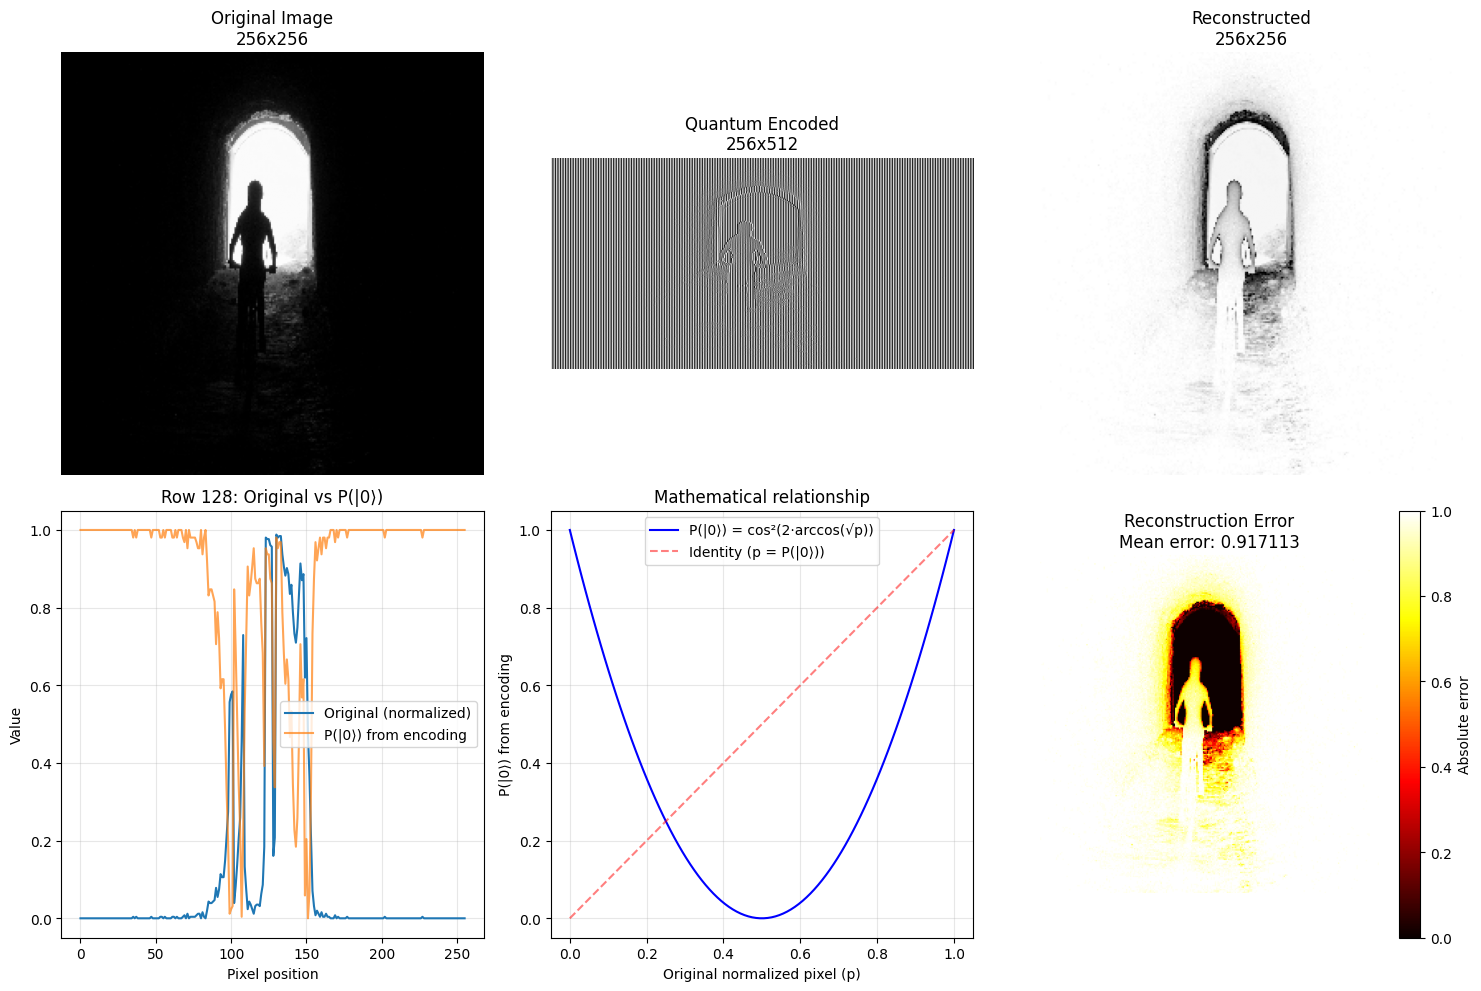


STEP 5: Saving results...
✓ Original saved as 'original_256x256.png'
✓ Quantum encoded saved as 'quantum_encoded_256x512.png'
✓ Reconstructed saved as 'reconstructed_256x256.png'

SUMMARY

Encoding scheme analysis:
  1. Angle calculation: θ = 2·arccos(√p)
  2. Quantum state: |ψ⟩ = cos(θ)|0⟩ + sin(θ)|1⟩
  3. P(|0⟩) = cos²(θ) = [2p - 1]²

Reconstruction:
  MSE: 58433.334885
  PSNR: 0.46 dB
  Average error: 0.917113

Key insight: Your encoding uses cos(θ), not cos(θ/2)!
This creates a nonlinear relationship between pixel value and P(|0⟩).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image


def upload_image():
    """Upload an image from local machine"""
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'Uploaded: {filename}')
        return filename
    return None


def convert(H, i_state):
    """Apply transformation matrix H to quantum state"""
    cov = np.dot(H, i_state)
    si = cov
    alpha = si[0][0]
    beta = si[1][0]
    return [alpha, beta]

def conv_img3_arcsin(img, use_probabilities=True):
    """
    EXACT REPLICATION of your original function
    This is what creates the quantum encoded 256x512 image
    """
    # Input: img of size (256, 256)
    # Output: converted of size (256, 512)

    small = cv2.resize(img, (256, 256))
    converted = np.zeros((256, 512), dtype=np.uint8)

    miny = np.amin(small)
    maxy = np.amax(small)

    if maxy == miny:
        maxy = miny + 1

    H = np.array([[1, 0], [0, 1]])

    for i in range(256):
        for j in range(256):
            # Normalize pixel value to [0,1] range
            normalized_val = (float(small[i][j]) - float(miny)) / (float(maxy) - float(miny))

            # Ensure the value is within [0,1] for sqrt
            normalized_val = np.clip(normalized_val, 0, 1)

            # Calculate angle using arccos
            angle = 2.0 * np.arcsin(np.sqrt(normalized_val))

            # Create quantum state - THIS IS THE KEY PART!
            # Using cos(angle) and sin(angle), NOT cos(angle/2) and sin(angle/2)
            a1 = np.cos(angle)
            a2 = np.sin(angle)
            i_state = np.array([[a1], [a2]])

            # Apply transformation
            c = convert(H, i_state)

            if use_probabilities:
                # Use analytic probabilities (squared amplitudes)
                prob0 = np.abs(c[0])**2
                prob1 = np.abs(c[1])**2

                # Scale to [0,255]
                val1 = np.clip(prob0 * 255, 0, 255)
                val2 = np.clip(prob1 * 255, 0, 255)
            else:
                # Original method: use amplitudes
                val1 = np.clip(c[0] * 255, 0, 255)
                val2 = np.clip(c[1] * 255, 0, 255)

            # Store in 256x512 output (2 values per original pixel)
            converted[i][2*j] = int(val1)
            if 2*j+1 < 512:
                converted[i][2*j+1] = int(val2)

    return converted

def conv_rgb3_arcsin(img, use_probabilities=True):
    """
    EXACT REPLICATION of your original RGB function
    """
    # Convert color space and resize
    if img.shape[2] == 4:
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    img = cv2.resize(img, (256, 256))

    # Split channels
    b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    # Convert each channel
    b1 = conv_img3_arcsin(b, use_probabilities)
    g1 = conv_img3_arcsin(g, use_probabilities)
    r1 = conv_img3_arcsin(r, use_probabilities)

    # Create output image with correct dimensions: (256, 512, 3)
    output_img = np.zeros((256, 512, 3), dtype=np.uint8)
    output_img[:, :, 0] = b1  # Blue channel
    output_img[:, :, 1] = g1  # Green channel
    output_img[:, :, 2] = r1  # Red channel

    return output_img


def analyze_encoding_math(pixel_value, min_val, max_val):
    """
    Mathematical analysis of your encoding scheme
    """
    # Step 1: Normalize pixel to [0,1]
    p = (float(pixel_value) - float(min_val)) / (float(max_val) - float(min_val))
    p = np.clip(p, 0, 1)

    # Step 2: Calculate angle
    angle = 2.0 * np.arccos(np.sqrt(p))

    # Step 3: Quantum state (YOUR encoding)
    alpha = np.cos(angle)
    beta = np.sin(angle)

    # Step 4: Analytic probabilities
    prob0 = np.abs(alpha)**2
    prob1 = np.abs(beta)**2

    print(f"Pixel value: {pixel_value}")
    print(f"Normalized (p): {p:.6f}")
    print(f"√p: {np.sqrt(p):.6f}")
    print(f"arccos(√p): {np.arccos(np.sqrt(p)):.6f} rad")
    print(f"Angle (θ = 2·arccos(√p)): {angle:.6f} rad")
    print(f"\nQuantum state components:")
    print(f"  α = cos(θ) = cos({angle:.6f}) = {alpha:.6f}")
    print(f"  β = sin(θ) = sin({angle:.6f}) = {beta:.6f}")
    print(f"\nAnalytic probabilities:")
    print(f"  P(|0⟩) = |α|² = {prob0:.6f}")
    print(f"  P(|1⟩) = |β|² = {prob1:.6f}")
    print(f"  Sum = {prob0 + prob1:.6f}")

    # Let's verify some trigonometric identities
    print(f"\nMathematical verification:")
    print(f"  cos²(θ) + sin²(θ) = {np.cos(angle)**2 + np.sin(angle)**2:.6f} (should be 1)")

    # What does this mean for reconstruction?
    print(f"\nReconstruction insight:")
    print(f"  P(|0⟩) = cos²(2·arccos(√p))")

    # Using trig identity: cos(2·arccos(x)) = 2x² - 1
    # So: P(|0⟩) = [2(√p)² - 1]² = [2p - 1]²
    trig_identity = (2*p - 1)**2
    print(f"  Using identity cos(2·arccos(x)) = 2x² - 1:")
    print(f"  P(|0⟩) = [2(√p)² - 1]² = [2p - 1]² = {trig_identity:.6f}")
    print(f"  Direct calculation: {prob0:.6f}")
    print(f"  Difference: {abs(prob0 - trig_identity):.6e}")

    return alpha, beta, prob0, prob1


def reconstruct_from_your_encoding(encoded_img):
    """
    Reconstruct 256x256 image from 256x512 encoded image
    using the mathematical inverse of your encoding
    """
    # Input: encoded_img of shape (256, 512, 3) for RGB or (256, 512) for grayscale
    # Output: reconstructed 256x256 image

    if len(encoded_img.shape) == 3:
        # RGB image
        height, width, channels = encoded_img.shape
        reconstructed = np.zeros((height, width//2, channels), dtype=np.uint8)

        for c in range(channels):
            for i in range(height):
                for j in range(width//2):
                    # Get the encoded probability value
                    encoded_val = encoded_img[i, 2*j, c]

                    # Convert back to probability
                    prob0 = encoded_val / 255.0

                    # Mathematical inversion:
                    # From analysis: P(|0⟩) = [2p - 1]² where p is original normalized pixel
                    # So: p = (1 ± √P(|0⟩)) / 2

                    # Since p ∈ [0,1], we take the positive root
                    sqrt_prob0 = np.sqrt(prob0)

                    # Two possible solutions:
                    p1 = (1 + sqrt_prob0) / 2
                    p2 = (1 - sqrt_prob0) / 2

                    # Choose the one that's in [0,1]
                    if 0 <= p1 <= 1:
                        p = p1
                    else:
                        p = p2

                    # Convert back to 0-255 range
                    reconstructed[i, j, c] = int(p * 255)
    else:
        # Grayscale image
        height, width = encoded_img.shape
        reconstructed = np.zeros((height, width//2), dtype=np.uint8)

        for i in range(height):
            for j in range(width//2):
                encoded_val = encoded_img[i, 2*j]
                prob0 = encoded_val / 255.0

                sqrt_prob0 = np.sqrt(prob0)
                p1 = (1 + sqrt_prob0) / 2
                p2 = (1 - sqrt_prob0) / 2

                if 0 <= p1 <= 1:
                    p = p1
                else:
                    p = p2

                reconstructed[i, j] = int(p * 255)

    return reconstructed


def visualize_full_analysis(original, encoded, reconstructed):
    """Visualize the full analysis"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    is_color = len(original.shape) == 3

    # Row 1: Images
    if is_color:
        axes[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        axes[0, 1].imshow(cv2.cvtColor(encoded, cv2.COLOR_BGR2RGB))
        axes[0, 2].imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))
    else:
        axes[0, 0].imshow(original, cmap='gray')
        axes[0, 1].imshow(encoded, cmap='gray')
        axes[0, 2].imshow(reconstructed, cmap='gray')

    axes[0, 0].set_title('Original Image\n256x256')
    axes[0, 1].set_title('Quantum Encoded\n256x512')
    axes[0, 2].set_title('Reconstructed\n256x256')

    for ax in axes[0, :]:
        ax.axis('off')

    # Row 2: Analysis
    # Get sample row for analysis
    row_idx = 128  # Middle row

    if is_color:
        # Use red channel for analysis
        original_row = original[row_idx, :, 2]
        encoded_row_prob0 = encoded[row_idx, ::2, 2] / 255.0
        reconstructed_row = reconstructed[row_idx, :, 2] / 255.0
    else:
        original_row = original[row_idx, :] / 255.0
        encoded_row_prob0 = encoded[row_idx, ::2] / 255.0
        reconstructed_row = reconstructed[row_idx, :] / 255.0

    # Plot 1: Original vs Encoded probabilities
    axes[1, 0].plot(original_row, label='Original (normalized)')
    axes[1, 0].plot(encoded_row_prob0, label='P(|0⟩) from encoding', alpha=0.7)
    axes[1, 0].set_xlabel('Pixel position')
    axes[1, 0].set_ylabel('Value')
    axes[1, 0].set_title('Row {}: Original vs P(|0⟩)'.format(row_idx))
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Plot 2: Mathematical relationship
    p_values = np.linspace(0, 1, 100)
    angles = 2 * np.arccos(np.sqrt(p_values))
    prob0_values = np.cos(angles)**2  # P(|0⟩) from your encoding

    axes[1, 1].plot(p_values, prob0_values, 'b-', label='P(|0⟩) = cos²(2·arccos(√p))')
    axes[1, 1].plot([0, 1], [0, 1], 'r--', alpha=0.5, label='Identity (p = P(|0⟩))')
    axes[1, 1].set_xlabel('Original normalized pixel (p)')
    axes[1, 1].set_ylabel('P(|0⟩) from encoding')
    axes[1, 1].set_title('Mathematical relationship')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Plot 3: Reconstruction error
    if is_color:
        original_float = original.astype(float) / 255.0
        reconstructed_float = reconstructed.astype(float) / 255.0
        error = np.abs(original_float - reconstructed_float)
        avg_error = np.mean(error)

        im = axes[1, 2].imshow(error.max(axis=2), cmap='hot')
        plt.colorbar(im, ax=axes[1, 2], label='Absolute error')
    else:
        error = np.abs(original.astype(float) - reconstructed.astype(float)) / 255.0
        avg_error = np.mean(error)

        im = axes[1, 2].imshow(error, cmap='hot')
        plt.colorbar(im, ax=axes[1, 2], label='Absolute error')

    axes[1, 2].set_title(f'Reconstruction Error\nMean error: {avg_error:.6f}')
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

    # Calculate reconstruction metrics
    if is_color:
        mse = np.mean((original.astype(float) - reconstructed.astype(float))**2)
    else:
        mse = np.mean((original.astype(float) - reconstructed.astype(float))**2)

    psnr = 10 * np.log10(255**2 / mse) if mse > 0 else float('inf')

    return mse, psnr, avg_error


def main():
    print("="*60)
    print("QUANTUM IMAGE ENCODING ANALYSIS")
    print("Focusing on cos(angle) encoding (not cos(angle/2))")
    print("="*60)

    # Upload image
    print("\n1. Upload an image:")
    image_path = upload_image()

    if image_path is None:
        print("Creating sample image...")
        # Create simple test image
        img = np.zeros((256, 256, 3), dtype=np.uint8)
        # Create gradient
        for i in range(256):
            for j in range(256):
                img[i, j] = [j, i, (i+j)//2]
        original_img = img
    else:
        # Load image
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        if img is None:
            # Try PIL
            img_pil = Image.open(io.BytesIO(open(image_path, 'rb').read()))
            img = np.array(img_pil)
            if len(img.shape) == 3:
                if img.shape[2] == 4:
                    img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
                else:
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        original_img = img

    # Resize to 256x256
    original_resized = cv2.resize(original_img, (256, 256))
    is_color = len(original_resized.shape) == 3

    print(f"\nImage info:")
    print(f"  Original shape: {original_img.shape}")
    print(f"  Resized shape: {original_resized.shape}")
    print(f"  Is color: {is_color}")

    # Step 1: Apply your exact encoding
    print("\n" + "="*60)
    print("STEP 1: Applying your quantum encoding...")
    print("="*60)

    if is_color:
        encoded_img = conv_rgb3_arcsin(original_resized, use_probabilities=True)
    else:
        encoded_img = conv_img3_arcsin(original_resized, use_probabilities=True)

    print(f"Encoded image shape: {encoded_img.shape}")

    # Step 2: Mathematical analysis
    print("\n" + "="*60)
    print("STEP 2: Mathematical analysis of encoding")
    print("="*60)

    if is_color:
        # Get min/max from blue channel
        sample_channel = original_resized[:, :, 0]
    else:
        sample_channel = original_resized

    min_val = np.amin(sample_channel)
    max_val = np.amax(sample_channel)

    # Analyze sample pixels
    sample_pixels = [0, 64, 128, 192, 255]  # Different intensity levels
    print(f"\nAnalyzing encoding for pixel values: {sample_pixels}")
    print("-" * 60)

    for pixel_val in sample_pixels:
        print(f"\nFor pixel value {pixel_val}:")
        analyze_encoding_math(pixel_val, min_val, max_val)

    # Step 3: Reconstruct using mathematical inversion
    print("\n" + "="*60)
    print("STEP 3: Reconstructing image...")
    print("="*60)

    reconstructed_img = reconstruct_from_your_encoding(encoded_img)
    print(f"Reconstructed shape: {reconstructed_img.shape}")

    # Step 4: Visualize and analyze
    print("\n" + "="*60)
    print("STEP 4: Visualizing results...")
    print("="*60)

    mse, psnr, avg_error = visualize_full_analysis(
        original_resized,
        encoded_img,
        reconstructed_img
    )

    # Step 5: Save results
    print("\n" + "="*60)
    print("STEP 5: Saving results...")
    print("="*60)

    cv2.imwrite('original_256x256.png', original_resized)
    cv2.imwrite('quantum_encoded_256x512.png', encoded_img)
    cv2.imwrite('reconstructed_256x256.png', reconstructed_img)

    print("✓ Original saved as 'original_256x256.png'")
    print("✓ Quantum encoded saved as 'quantum_encoded_256x512.png'")
    print("✓ Reconstructed saved as 'reconstructed_256x256.png'")

    print("\n" + "="*60)
    print("SUMMARY")
    print("="*60)
    print(f"\nEncoding scheme analysis:")
    print(f"  1. Angle calculation: θ = 2·arccos(√p)")
    print(f"  2. Quantum state: |ψ⟩ = cos(θ)|0⟩ + sin(θ)|1⟩")
    print(f"  3. P(|0⟩) = cos²(θ) = [2p - 1]²")
    print(f"\nReconstruction:")
    print(f"  MSE: {mse:.6f}")
    print(f"  PSNR: {psnr:.2f} dB")
    print(f"  Average error: {avg_error:.6f}")
    print(f"\nKey insight: Your encoding uses cos(θ), not cos(θ/2)!")
    print("This creates a nonlinear relationship between pixel value and P(|0⟩).")


if __name__ == "__main__":
    main()